c:\Users\kubas\Desktop\Projekt dyplomowy\Audio-Emotion-Recognition\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Wczytywanie datasetu...
Wyświetlanie próbki audio:

Próbka audio #0
Emocja: surprised
Tekst: Ucho wykrywa dźwięki o różnej częstotliwości.
Speaker ID: WR0
Częstotliwość próbkowania: 24000 Hz
Długość nagrania: 2.94 sekund

Odtwórz audio:


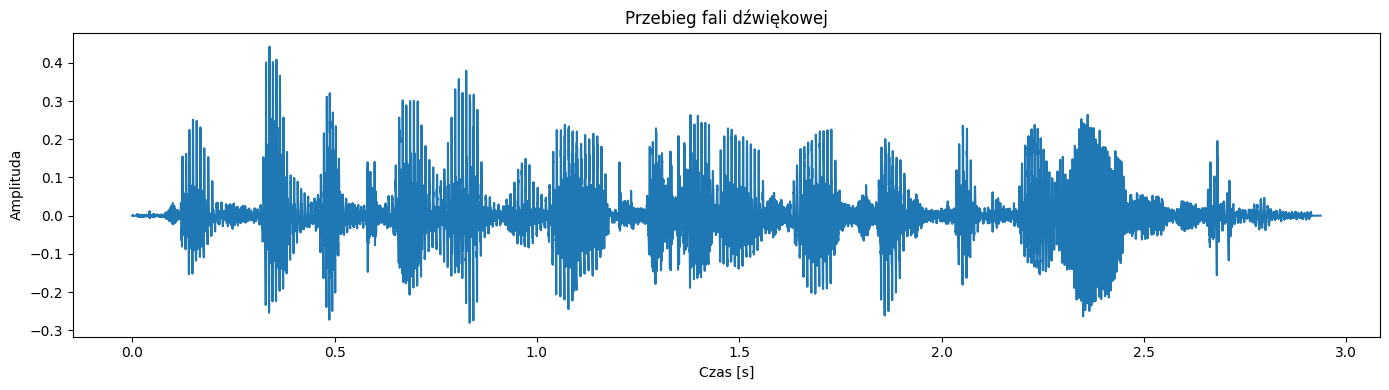

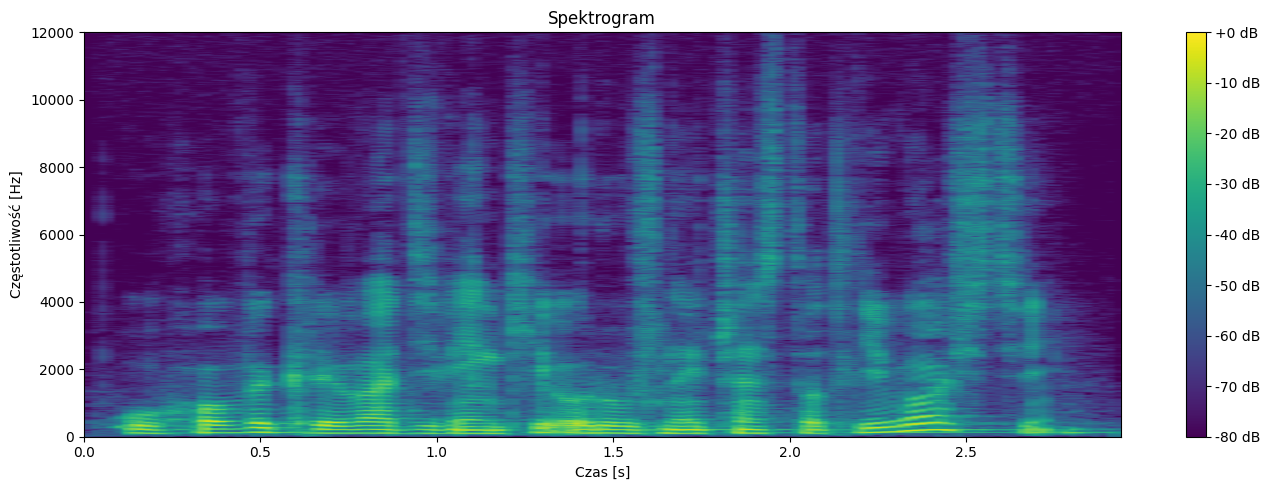

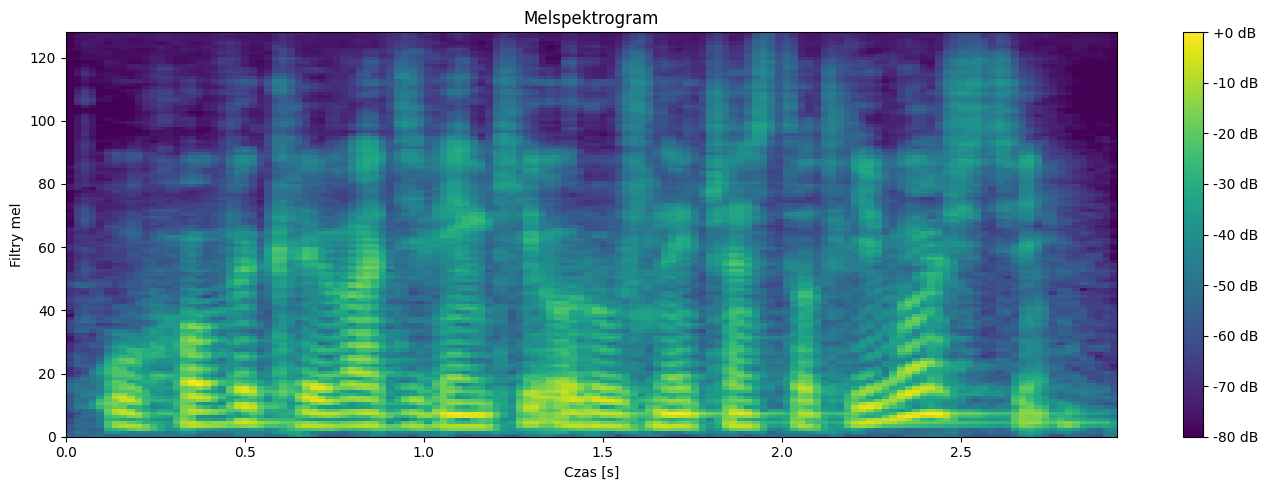

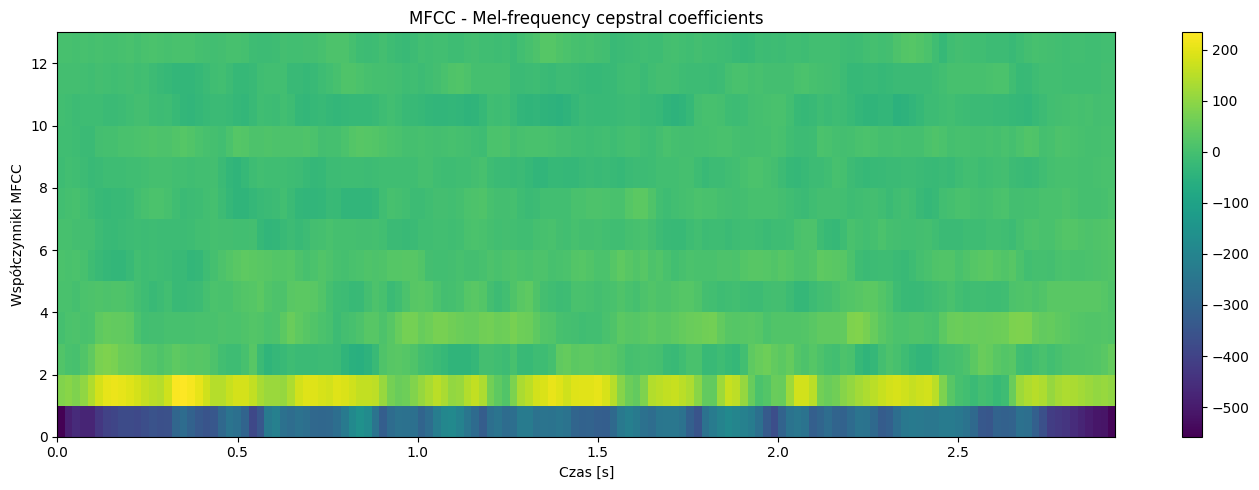

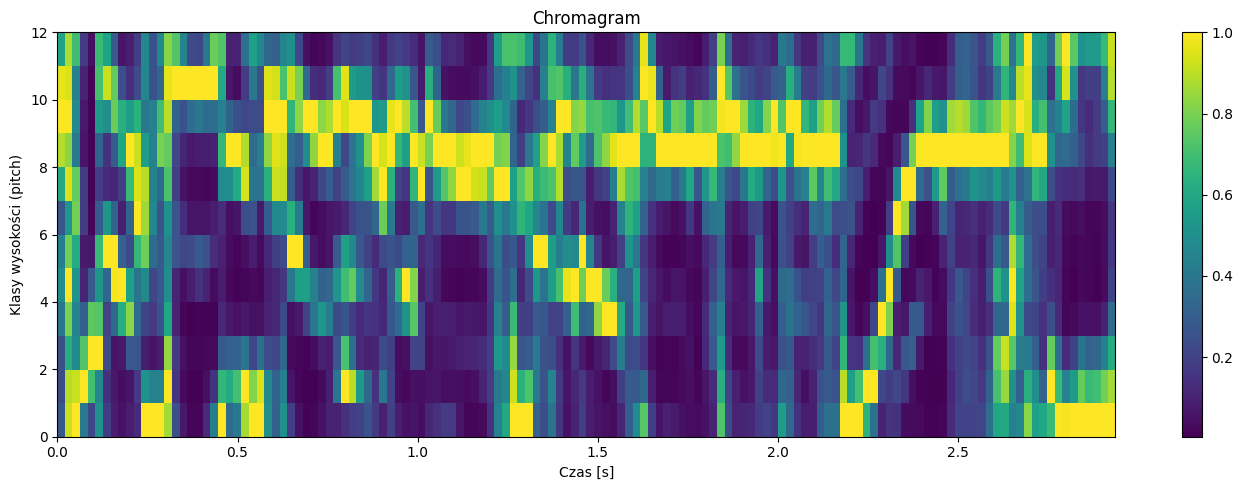

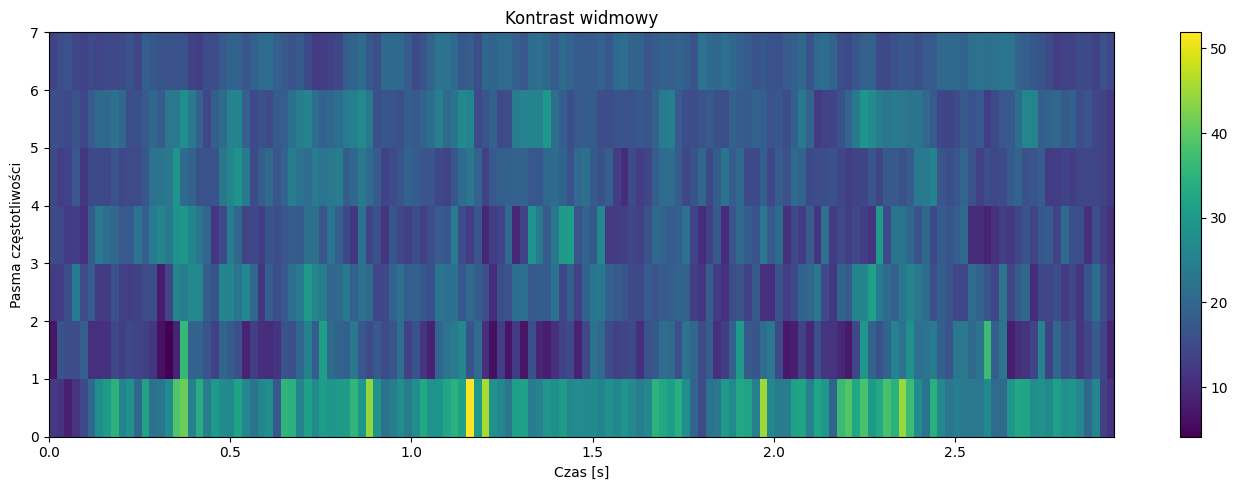

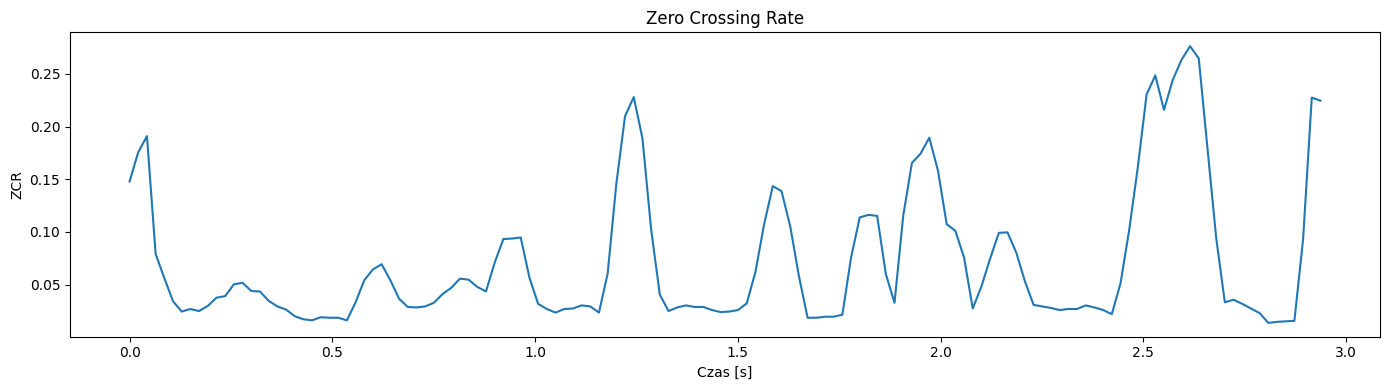

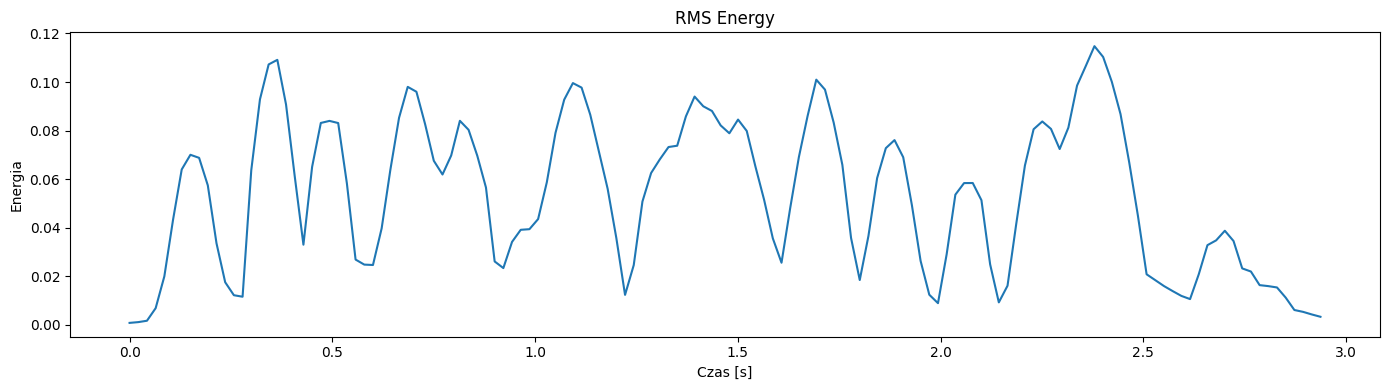

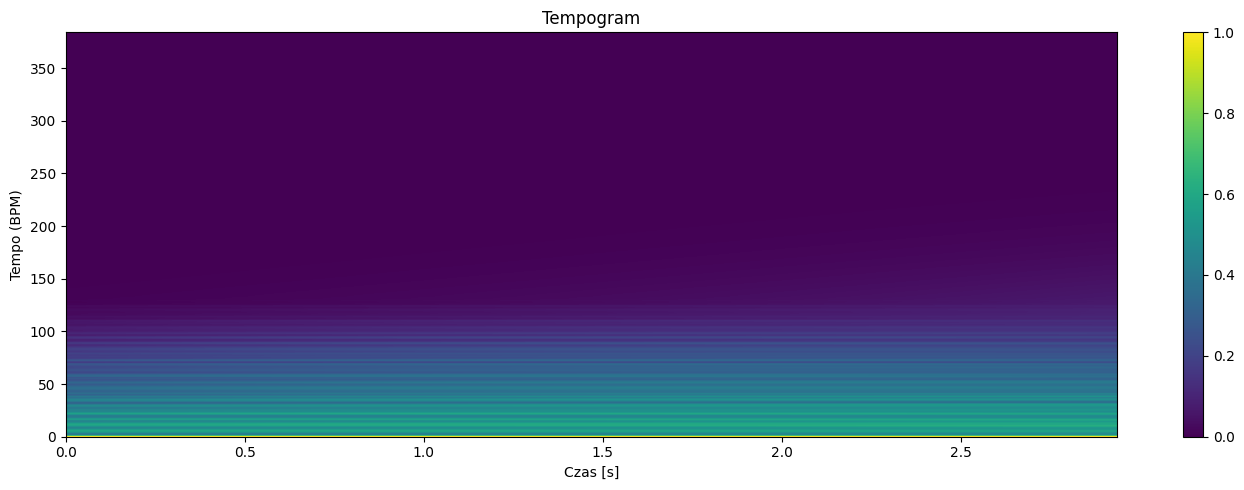

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa
from datasets import load_from_disk

# 1. Wczytaj dataset
print("Wczytywanie datasetu...")
dataset = load_from_disk('data/nemo_dataset')

# 2. Funkcja do wizualizacji i odtwarzania audio z dodatkowymi wizualizacjami
def visualize_audio(idx=0, title=None):
    """Wyodrębnij i wizualizuj próbkę audio z datasetu."""
    # Pobierz sample
    sample = dataset['train'][idx]
    audio_data = sample['audio']
    audio_array = audio_data['array']
    sr = audio_data['sampling_rate']
    
    # Informacje o próbce
    if title:
        print(f"\n{title}")
    else:
        print(f"\nPróbka audio #{idx}")
        
    print(f"Emocja: {sample['emotion']}")
    print(f"Tekst: {sample['raw_text']}")
    print(f"Speaker ID: {sample['speaker_id']}")
    print(f"Częstotliwość próbkowania: {sr} Hz")
    print(f"Długość nagrania: {len(audio_array)/sr:.2f} sekund")
    
    # Odtwarzanie audio
    print("\nOdtwórz audio:")
    display(ipd.Audio(audio_array, rate=sr))
    
    # 1. Wizualizacja przebiegu fali dźwiękowej
    plt.figure(figsize=(14, 4))
    time = np.arange(0, len(audio_array)) / sr
    plt.plot(time, audio_array)
    plt.title('Przebieg fali dźwiękowej')
    plt.xlabel('Czas [s]')
    plt.ylabel('Amplituda')
    plt.tight_layout()
    plt.show()
    
    # 2. Spektrogram
    try:
        plt.figure(figsize=(14, 5))
        D = librosa.stft(audio_array)
        D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
        plt.imshow(D_db, aspect='auto', origin='lower', 
                   extent=[0, len(audio_array)/sr, 0, sr/2])
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spektrogram')
        plt.ylabel('Częstotliwość [Hz]')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować spektrogramu: {e}")
    
    # 3. Melspektrogram
    try:
        plt.figure(figsize=(14, 5))
        mel_spect = librosa.feature.melspectrogram(y=audio_array, sr=sr)
        mel_spect_db = librosa.power_to_db(mel_spect, ref=np.max)
        plt.imshow(mel_spect_db, aspect='auto', origin='lower', 
                   extent=[0, len(audio_array)/sr, 0, 128])
        plt.colorbar(format='%+2.0f dB')
        plt.title('Melspektrogram')
        plt.ylabel('Filtry mel')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować melspektrogramu: {e}")
    
    # 4. MFCC (Mel-Frequency Cepstral Coefficients) - bardzo ważne do rozpoznawania emocji
    try:
        plt.figure(figsize=(14, 5))
        mfccs = librosa.feature.mfcc(y=audio_array, sr=sr, n_mfcc=13)
        plt.imshow(mfccs, aspect='auto', origin='lower', 
                   extent=[0, len(audio_array)/sr, 0, 13])
        plt.colorbar()
        plt.title('MFCC - Mel-frequency cepstral coefficients')
        plt.ylabel('Współczynniki MFCC')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować MFCC: {e}")
        
    # 5. Chroma Features - reprezentują tonalność dźwięku
    try:
        plt.figure(figsize=(14, 5))
        chroma = librosa.feature.chroma_stft(y=audio_array, sr=sr)
        plt.imshow(chroma, aspect='auto', origin='lower', 
                   extent=[0, len(audio_array)/sr, 0, 12])
        plt.colorbar()
        plt.title('Chromagram')
        plt.ylabel('Klasy wysokości (pitch)')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować chromagramu: {e}")
    
    # 6. Spectral Contrast - kontrast widmowy, przydatny w analizie emocji mowy
    try:
        plt.figure(figsize=(14, 5))
        contrast = librosa.feature.spectral_contrast(y=audio_array, sr=sr)
        plt.imshow(contrast, aspect='auto', origin='lower', 
                   extent=[0, len(audio_array)/sr, 0, contrast.shape[0]])
        plt.colorbar()
        plt.title('Kontrast widmowy')
        plt.ylabel('Pasma częstotliwości')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować kontrastu widmowego: {e}")
    
    # 7. Zero Crossing Rate - przydatne w rozpoznawaniu emocji (np. szept, krzyk)
    try:
        plt.figure(figsize=(14, 4))
        zcr = librosa.feature.zero_crossing_rate(audio_array)
        plt.plot(np.linspace(0, len(audio_array)/sr, len(zcr[0])), zcr[0])
        plt.title('Zero Crossing Rate')
        plt.ylabel('ZCR')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować ZCR: {e}")
    
    # 8. RMS Energy - energia sygnału (głośność) - ważne dla emocji
    try:
        plt.figure(figsize=(14, 4))
        rms = librosa.feature.rms(y=audio_array)
        plt.plot(np.linspace(0, len(audio_array)/sr, len(rms[0])), rms[0])
        plt.title('RMS Energy')
        plt.ylabel('Energia')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować RMS: {e}")
    
    # 9. Spektrogram tempa - przydatny do określenia dynamiki mowy
    try:
        plt.figure(figsize=(14, 5))
        onset_env = librosa.onset.onset_strength(y=audio_array, sr=sr)
        tempogram = librosa.feature.tempogram(onset_envelope=onset_env, sr=sr)
        plt.imshow(tempogram, aspect='auto', origin='lower', 
                  extent=[0, len(audio_array)/sr, 0, tempogram.shape[0]])
        plt.colorbar()
        plt.title('Tempogram')
        plt.ylabel('Tempo (BPM)')
        plt.xlabel('Czas [s]')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Nie udało się wygenerować tempogramu: {e}")
    
    return sample

# 3. Wyświetl konkretną próbkę audio
print("Wyświetlanie próbki audio:")
try:
    visualize_audio(0)  # Możesz zmienić indeks, aby zobaczyć inną próbkę
except Exception as e:
    print(f"Błąd podczas przetwarzania próbki: {e}")

# 4. Funkcja do porównania tej samej cechy dla różnych emocji
def compare_feature_across_emotions(feature_name='mfcc', num_examples=1):
    """Porównaj wybraną cechę audio dla różnych emocji."""
    # Pobierz unikalne emocje
    emotions = sorted(set(dataset['train']['emotion']))
    print(f"Porównanie {feature_name} dla różnych emocji: {emotions}")
    
    # Dla każdej emocji znajdź pierwszy przykład
    plt.figure(figsize=(15, 10))
    
    for i, emotion in enumerate(emotions):
        # Znajdź indeks pierwszego elementu z daną emocją
        indices = [idx for idx, e in enumerate(dataset['train']['emotion']) if e == emotion]
        if indices and i < num_examples:
            sample = dataset['train'][indices[0]]
            audio_array = sample['audio']['array']
            sr = sample['audio']['sampling_rate']
            
            plt.subplot(len(emotions), 1, i+1)
            
            try:
                if feature_name == 'mfcc':
                    feature = librosa.feature.mfcc(y=audio_array, sr=sr, n_mfcc=13)
                    plt.imshow(feature, aspect='auto', origin='lower')
                elif feature_name == 'mel':
                    feature = librosa.feature.melspectrogram(y=audio_array, sr=sr)
                    feature_db = librosa.power_to_db(feature, ref=np.max)
                    plt.imshow(feature_db, aspect='auto', origin='lower')
                elif feature_name == 'chroma':
                    feature = librosa.feature.chroma_stft(y=audio_array, sr=sr)
                    plt.imshow(feature, aspect='auto', origin='lower')
                
                plt.title(f"Emocja: {emotion}")
                plt.ylabel(feature_name.upper())
                plt.tight_layout()
            except Exception as e:
                print(f"Błąd podczas generowania {feature_name} dla emocji {emotion}: {e}")
    
    plt.tight_layout()
    plt.show()
